In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dense ,Flatten

In [12]:
# preparing independent and dependent features

def prepare_data(timeseries_data ,n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        #find the end of this pattern
        end_ix = i+n_features
        #check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        #gather input and output parts of the pattern
        seq_x ,seq_y = timeseries_data[i:end_ix],timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [16]:
timeseries_data = [110,125,133,146,158,172,187,196,210]

#choose a number of time steps

n_steps =3
X,y =prepare_data(timeseries_data ,n_steps)

In [17]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [18]:
X.shape

(6, 3)

In [19]:
y.shape

(6,)

In [20]:
#reshape from [sample ,timesteps] into [samples,timesteps,features]
n_features =1
X=X.reshape(X.shape[0] ,X.shape[1],n_features)

# Building LSTM Model

In [22]:
# define model

model =Sequential()
model.add(LSTM(50,activation ='relu',return_sequences = True ,input_shape =(n_steps,n_features)))
model.add(LSTM(50,activation ='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')

#fit model

model.fit(X,y,epochs =200 ,verbose =1)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 33472.2344
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 33214.3086
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 32967.9648
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 32732.7871
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 32508.3691
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 32293.5000
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 32085.2988
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 31878.8809
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 31668.4277
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 31447.9863
Epoch 11/200
1/1 [==============================] - 0s 10ms/step - loss: 31212.4688
Epoch 12/200
1/1 [==============================] - 0s 11ms/step - loss: 30959.5469
Epoch 13/

1/1 [==============================] - 0s 18ms/step - loss: 16.8536
Epoch 102/200
1/1 [==============================] - 0s 14ms/step - loss: 16.9092
Epoch 103/200
1/1 [==============================] - 0s 8ms/step - loss: 16.9501
Epoch 104/200
1/1 [==============================] - 0s 6ms/step - loss: 16.9451
Epoch 105/200
1/1 [==============================] - 0s 12ms/step - loss: 16.8775
Epoch 106/200
1/1 [==============================] - 0s 5ms/step - loss: 16.7462
Epoch 107/200
1/1 [==============================] - 0s 5ms/step - loss: 16.5642
Epoch 108/200
1/1 [==============================] - 0s 7ms/step - loss: 16.3530
Epoch 109/200
1/1 [==============================] - 0s 8ms/step - loss: 16.1279
Epoch 110/200
1/1 [==============================] - 0s 6ms/step - loss: 15.9146
Epoch 111/200
1/1 [==============================] - 0s 10ms/step - loss: 15.7276
Epoch 112/200
1/1 [==============================] - 0s 5ms/step - loss: 15.5688
Epoch 113/200
1/1 [===================

# predicting for the next 10 data

In [26]:
 # demonstrate prediction for next 10 days
x_input = np.array([187,196,210])
temp_input = list(x_input)
ist_output = []
i =0 
while(i<10):
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1,n_steps,n_features))
        ypred = model.predict(x_input,verbose=1)
        print("{} day output is {} ".format(i,ypred))
        temp_input.append(ypred[0][0])
        temp_input = temp_input[1:]
        ist_output.append(ypred[0][0])
        i= i+1
    else:
        x_input = x_input.reshape((1,n_steps,n_features))
        ypred = model.predict(x_input,verbose=1)
        print(ypred)
        temp_input.append(ypred[0][0])
        ist_output.append(ypred[0][0])
        i = i+1
print(ist_output)

1/1 [==============================] - 0s 15ms/step
[[225.45871]]
1 day input [196.         210.         225.45870972]
1/1 [==============================] - 0s 246ms/step
1 day output is [[236.99217]] 
2 day input [210.         225.45870972 236.99217224]
1/1 [==============================] - 0s 15ms/step
2 day output is [[251.91646]] 
3 day input [225.45871 236.99217 251.91646]
1/1 [==============================] - 0s 13ms/step
3 day output is [[267.31525]] 
4 day input [236.99217 251.91646 267.31525]
1/1 [==============================] - 0s 16ms/step
4 day output is [[281.18744]] 
5 day input [251.91646 267.31525 281.18744]
1/1 [==============================] - 0s 19ms/step
5 day output is [[297.32687]] 
6 day input [267.31525 281.18744 297.32687]
1/1 [==============================] - 0s 13ms/step
6 day output is [[313.75266]] 
7 day input [281.18744 297.32687 313.75266]
1/1 [==============================] - 0s 16ms/step
7 day output is [[329.95856]] 
8 day input [297.32687 313

In [27]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

# Visualizing the output

In [28]:
import matplotlib.pyplot as plt


In [29]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

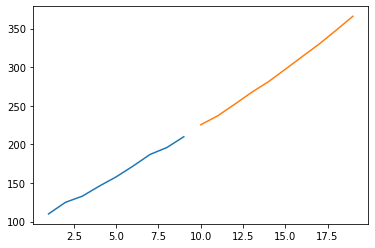

In [30]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,ist_output)